# Определение перспективного тарифа для телеком компании

## Описание задачи

Для федерального оператора сотовой связи компании необходимо сделать предварительный анализ тарифов «Смарт» и «Ультра» для дальнейшей корректировки рекламного бюджета. Предоставленны данные 500 пользователей за 2018 год. Нужно проанализировать поведение клиентов и сделать вывод — какой тариф лучше.

#### Описание тарифов

Тариф «Смарт»
- Ежемесячная плата: 550 рублей
- Включено 500 минут разговора, 50 сообщений и 15 Гб интернет-трафика
- Стоимость услуг сверх тарифного пакета: минута разговора - 3 рубля; сообщение - 3 рубля ; 1 Гб интернет-трафика - 200 рублей

Тариф «Ультра»
- Ежемесячная плата: 1950 рублей
- Включено 3000 минут разговора, 1000 сообщений и 30 Гб интернет-трафика
- Стоимость услуг сверх тарифного пакета: минута разговора - 1 рубль; сообщение - 1 рубль; 1 Гб интернет-трафика - 150 рублей

## План работы

- Шаг 1. Откроем файлы и изучим информацию;
- Шаг 2. Подготовка данных
- Шаг 3. Анализ данных;
- Шаг 4. Проверяем гипотезы;
- Шаг 5. Общий вывод.

## Шаг 1. Откроем файлы и изучим информацию.

In [1]:
# Импортируем необходимые библиотеки
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats as st

In [2]:
# Ознакомимся с датасетом данных пользователей
users = pd.read_csv('/datasets/users.csv')
users

,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff
0,1000,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
1,1001,41,NaN,Москва,Иван,Ежов,2018-11-01,smart
2,1002,59,NaN,Стерлитамак,Евгений,Абрамович,2018-06-17,smart
3,1003,23,NaN,Москва,Белла,Белякова,2018-08-17,ultra
4,1004,68,NaN,Новокузнецк,Татьяна,Авдеенко,2018-05-14,ultra
...,...,...,...,...,...,...,...,...
495,1495,65,NaN,Иркутск,Авксентий,Фокин,2018-08-28,ultra
496,1496,36,NaN,Вологда,Трифон,Блохин,2018-01-27,smart
497,1497,32,NaN,Челябинск,Каролина,Агеева,2018-10-09,smart
498,1498,68,2018-10-25,Владикавказ,Всеволод,Акимчин,2018-07-19,smart


In [3]:
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
user_id       500 non-null int64
age           500 non-null int64
churn_date    38 non-null object
city          500 non-null object
first_name    500 non-null object
last_name     500 non-null object
reg_date      500 non-null object
tariff        500 non-null object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB


Датафрейм из 500 строк и 8 колонок.
- user_id — уникальный идентификатор пользователя
- first_name — имя пользователя
- last_name — фамилия пользователя
- age — возраст пользователя (годы)
- reg_date — дата подключения тарифа (день, месяц, год)
- churn_date — дата прекращения пользования тарифом (если значение пропущено, то тариф ещё действовал на момент выгрузки данных)
- city — город проживания пользователя
- tariff — название тарифного плана

In [4]:
# Ознакомимся с датасетом звонков пользоватлей
calls = pd.read_csv('/datasets/calls.csv')
calls

,id,call_date,duration,user_id
0,1000_0,2018-07-25,0.00,1000
1,1000_1,2018-08-17,0.00,1000
2,1000_2,2018-06-11,2.85,1000
3,1000_3,2018-09-21,13.80,1000
4,1000_4,2018-12-15,5.18,1000
...,...,...,...,...
202602,1499_215,2018-12-26,0.76,1499
202603,1499_216,2018-10-18,18.83,1499
202604,1499_217,2018-11-10,10.81,1499
202605,1499_218,2018-10-06,4.27,1499


In [5]:
calls.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202607 entries, 0 to 202606
Data columns (total 4 columns):
id           202607 non-null object
call_date    202607 non-null object
duration     202607 non-null float64
user_id      202607 non-null int64
dtypes: float64(1), int64(1), object(2)
memory usage: 6.2+ MB


Датафрейм из 202607 строк и 4 колонок.

- id — уникальный номер звонка
- call_date — дата звонка
- duration — длительность звонка в минутах
- user_id — идентификатор пользователя, сделавшего звонок

In [6]:
# Ознакомимся с датасетом сообщений пользоватлей
messages = pd.read_csv('/datasets/messages.csv')
messages

,id,message_date,user_id
0,1000_0,2018-06-27,1000
1,1000_1,2018-10-08,1000
2,1000_2,2018-08-04,1000
3,1000_3,2018-06-16,1000
4,1000_4,2018-12-05,1000
...,...,...,...
123031,1499_179,2018-12-12,1499
123032,1499_180,2018-09-28,1499
123033,1499_181,2018-09-27,1499
123034,1499_182,2018-11-15,1499


In [7]:
messages.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123036 entries, 0 to 123035
Data columns (total 3 columns):
id              123036 non-null object
message_date    123036 non-null object
user_id         123036 non-null int64
dtypes: int64(1), object(2)
memory usage: 2.8+ MB


Датафрейм из 123036 строк и 3 колонок.

- id — уникальный номер сообщения
- message_date — дата сообщения
- user_id — идентификатор пользователя, отправившего сообщение

In [8]:
# Ознакомимся с датасетом интернет трафика пользоватлей
internet = pd.read_csv('/datasets/internet.csv')
internet

,id,mb_used,session_date,user_id
0,1000_0,112.95,2018-11-25,1000
1,1000_1,1052.81,2018-09-07,1000
2,1000_2,1197.26,2018-06-25,1000
3,1000_3,550.27,2018-08-22,1000
4,1000_4,302.56,2018-09-24,1000
...,...,...,...,...
149391,1499_152,318.90,2018-10-03,1499
149392,1499_153,490.13,2018-12-14,1499
149393,1499_154,0.00,2018-10-27,1499
149394,1499_155,1246.32,2018-11-26,1499


In [9]:
internet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149396 entries, 0 to 149395
Data columns (total 4 columns):
id              149396 non-null object
mb_used         149396 non-null float64
session_date    149396 non-null object
user_id         149396 non-null int64
dtypes: float64(1), int64(1), object(2)
memory usage: 4.6+ MB


Датафрейм из 123036 строк и 3 колонок.

- id — уникальный номер сессии
- mb_used — объём потраченного за сессию интернет-трафика (в мегабайтах)
- session_date — дата интернет-сессии
- user_id — идентификатор пользователя

In [10]:
# Ознакомимся с датасетом тарифов
tariffs = pd.read_csv('/datasets/tariffs.csv')
tariffs

,messages_included,mg_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff_name
0,50,15360,500,550,200,3,3,smart
1,1000,30720,3000,1950,150,1,1,ultra


- tariff_name — название тарифа
- rub_monthly_fee — ежемесячная абонентская плата в рублях
- minutes_included — количество минут разговора в месяц, включённых в абонентскую плату
- messages_included — количество сообщений в месяц, включённых в абонентскую плату
- mb_per_month_included — объём интернет-трафика, включённого в абонентскую плату (в мегабайтах)
- rub_per_minute — стоимость минуты разговора сверх тарифного пакета (например, если в тарифе 100 минут разговора в месяц, то со 101 минуты будет взиматься плата)
- rub_per_message — стоимость отправки сообщения сверх тарифного пакета
- rub_per_gb — стоимость дополнительного гигабайта интернет-трафика сверх тарифного пакета (1 гигабайт = 1024 мегабайта)

### Вывод

Информация о пользователях и их активности указана в 4 датафреймах users, calls, messages и internet. Для дальнейшего анализа  датафреймы calls, messages и internet необходимо соединить в один. Отмечаем, что в в данных о звонках большое кол-во звонков продолжительностью 0 минут, данные требуют предобработки. В таблице с информацией о пользователях присутствуют пропущенные значения в столбце даты прекращения пользования тарифом, это означает, что тариф у данного пользователя действовал на момент выгрузки. Также необходимо привести формат даты к datetime.

## Шаг 2. Подготовка данных.

In [11]:
# Заменим значения продолжительности разговора 0.0 минут на одну минуту
calls.loc[calls['duration'] == 0, 'duration'] = 1
calls.duration.value_counts()

1.00     39701
4.49       142
5.50       142
6.15       141
6.38       141
         ...  
28.49        1
26.16        1
25.76        1
27.26        1
27.63        1
Name: duration, Length: 2870, dtype: int64

In [12]:
# Округлим значения звонков до минуты
calls.duration = calls.duration.apply(np.ceil)
calls

,id,call_date,duration,user_id
0,1000_0,2018-07-25,1.0,1000
1,1000_1,2018-08-17,1.0,1000
2,1000_2,2018-06-11,3.0,1000
3,1000_3,2018-09-21,14.0,1000
4,1000_4,2018-12-15,6.0,1000
...,...,...,...,...
202602,1499_215,2018-12-26,1.0,1499
202603,1499_216,2018-10-18,19.0,1499
202604,1499_217,2018-11-10,11.0,1499
202605,1499_218,2018-10-06,5.0,1499


In [13]:
# Приведем все значения даты к формату datetime
calls['call_date'] = pd.to_datetime(calls['call_date'], format='%Y-%m-%d')
messages['message_date'] = pd.to_datetime(messages['message_date'], format='%Y-%m-%d')
internet['session_date'] = pd.to_datetime(internet['session_date'], format='%Y-%m-%d')

In [14]:
# Выделим месяц по каждой таблице с активностями клиентов
calls['month'] = pd.DatetimeIndex(calls['call_date']).month
messages['month'] = pd.DatetimeIndex(messages['message_date']).month
internet['month'] = pd.DatetimeIndex(internet['session_date']).month

In [15]:
# Для удобства дальнейшего анализа объеденим таблицы calls, messages и internet в один датафрейм
# Для начала сгруппируем все столбцы по user_id и month
calls_pivot = calls.pivot_table(index=['user_id', 'month'], values='duration', aggfunc='sum')
messages_pivot = messages.pivot_table(index=['user_id', 'month'], values='id', aggfunc='count')
internet_pivot = internet.pivot_table(index=['user_id', 'month'], values='mb_used', aggfunc='sum')
calls_pivot

duration
user_id month          
1000    5         164.0
        6         187.0
        7         346.0
        8         418.0
        9         478.0
...                 ...
1498    10        258.0
1499    9          71.0
        10        473.0
        11        624.0
        12        505.0

[3174 rows x 1 columns]

In [16]:
# Округлим израсходованный трафик за каждый месяц до гигабайта
internet_pivot.mb_used = (internet_pivot.mb_used / 1024).apply(np.ceil)
internet_pivot

mb_used
user_id month         
1000    5          3.0
        6         23.0
        7         14.0
        8         14.0
        9         15.0
...                ...
1498    10        21.0
1499    9          2.0
        10        18.0
        11        18.0
        12        13.0

[3203 rows x 1 columns]

In [17]:
# Объеденим таблицы

calls_messenges_internet = ((calls_pivot.merge(messages_pivot, on=['user_id', 'month']))
                                       .merge(internet_pivot, on=['user_id', 'month'])
                                       .rename(columns={'duration':'minutes', 'id':'messenges', 'mb_used':'gb_used'})
                           )
calls_messenges_internet

minutes  messenges  gb_used
user_id month                             
1000    5        164.0         22      3.0
        6        187.0         60     23.0
        7        346.0         75     14.0
        8        418.0         81     14.0
        9        478.0         57     15.0
...                ...        ...      ...
1498    10       258.0         42     21.0
1499    9         71.0         11      2.0
        10       473.0         48     18.0
        11       624.0         59     18.0
        12       505.0         66     13.0

[2667 rows x 3 columns]

In [18]:
# Добавим наименование тарифа
users_tariff = users[['user_id', 'tariff']]
calls_messenges_internet_tariff = calls_messenges_internet.reset_index().merge(users_tariff, on='user_id')
calls_messenges_internet_tariff

,user_id,month,minutes,messenges,gb_used,tariff
0,1000,5,164.0,22,3.0,ultra
1,1000,6,187.0,60,23.0,ultra
2,1000,7,346.0,75,14.0,ultra
3,1000,8,418.0,81,14.0,ultra
4,1000,9,478.0,57,15.0,ultra
...,...,...,...,...,...,...
2662,1498,10,258.0,42,21.0,smart
2663,1499,9,71.0,11,2.0,smart
2664,1499,10,473.0,48,18.0,smart
2665,1499,11,624.0,59,18.0,smart


In [19]:
# Добавим информацию о тарифах
tariffs = tariffs.rename(columns={'tariff_name':'tariff'})
data_revenue = calls_messenges_internet_tariff.merge(tariffs, on='tariff')
# Переведем значение mg_per_month_included в гигабайты
data_revenue['gb_per_month_included'] = data_revenue['mg_per_month_included'] / 1024
data_revenue

,user_id,month,minutes,messenges,gb_used,tariff,messages_included,mg_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,gb_per_month_included
0,1000,5,164.0,22,3.0,ultra,1000,30720,3000,1950,150,1,1,30.0
1,1000,6,187.0,60,23.0,ultra,1000,30720,3000,1950,150,1,1,30.0
2,1000,7,346.0,75,14.0,ultra,1000,30720,3000,1950,150,1,1,30.0
3,1000,8,418.0,81,14.0,ultra,1000,30720,3000,1950,150,1,1,30.0
4,1000,9,478.0,57,15.0,ultra,1000,30720,3000,1950,150,1,1,30.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2662,1498,10,258.0,42,21.0,smart,50,15360,500,550,200,3,3,15.0
2663,1499,9,71.0,11,2.0,smart,50,15360,500,550,200,3,3,15.0
2664,1499,10,473.0,48,18.0,smart,50,15360,500,550,200,3,3,15.0
2665,1499,11,624.0,59,18.0,smart,50,15360,500,550,200,3,3,15.0


In [20]:
# Посчитаем овердрафт
data_revenue['minutes_overdraft'] = data_revenue['minutes'] - data_revenue['minutes_included']
data_revenue['messenges_overdraft'] = data_revenue['messenges'] - data_revenue['messages_included']
data_revenue['gb_used_overdraft'] = data_revenue['gb_used'] - data_revenue['gb_per_month_included']
# Убираем отрицательные значения овердрафта
data_revenue.loc[data_revenue['minutes_overdraft'] < 0, 'minutes_overdraft'] = 0
data_revenue.loc[data_revenue['messenges_overdraft'] < 0, 'messenges_overdraft'] = 0
data_revenue.loc[data_revenue['gb_used_overdraft'] < 0, 'gb_used_overdraft'] = 0
# Считаем прибыль
data_revenue['revenue'] = data_revenue['minutes_overdraft'] * data_revenue['rub_per_minute'] + \
                          data_revenue['messenges_overdraft'] * data_revenue['rub_per_message'] + \
                          data_revenue['gb_used_overdraft'] * data_revenue['rub_per_gb'] +  \
                          data_revenue['rub_monthly_fee']
data_revenue[['user_id', 'revenue', 'tariff']]

,user_id,revenue,tariff
0,1000,1950.0,ultra
1,1000,1950.0,ultra
2,1000,1950.0,ultra
3,1000,1950.0,ultra
4,1000,1950.0,ultra
...,...,...,...
2662,1498,1750.0,smart
2663,1499,550.0,smart
2664,1499,1150.0,smart
2665,1499,1549.0,smart


In [21]:
data_revenue.tariff.value_counts()

smart    1915
ultra     752
Name: tariff, dtype: int64

In [22]:
# Взглянем на показатели выручки по каждому тарифу
data_revenue.pivot_table(index='tariff', values='revenue', aggfunc=['mean', 'median', 'sum','max', 'min'])

,mean,median,sum,max,min
,revenue,revenue,revenue,revenue,revenue
tariff,,,,,
smart,1307.95718,1046.0,2504738.0,6824.0,550.0
ultra,2048.93617,1950.0,1540800.0,4800.0,1950.0


### Вывод

Не смотря на то, что пользователей тарифом smart в 2.5 раза больше, чем пользователей тарифом ultra, суммарная выручка по пользователям тарифа smart превышает суммарную выручку по пользователям тарифа ultra только в 1.6 раза. Предположим, что пользователи тарифа smart гораздо чаще превышают лимит тарифного плана, нежели пользователи тарифа ultra.

## Шаг 3. Анализ данных

In [23]:
# Выведем среднее число минут, сообщений и трафика в гигабайтах, которые использует пользователь в месяц по каждому тарифу
data_revenue.pivot_table(index='tariff', values=['minutes', 'messenges', 'gb_used'])

,gb_used,messenges,minutes
tariff,,,
smart,16.362924,38.767102,432.637598
ultra,19.618351,61.640957,571.845745


In [24]:
# Выделим два отдельных датасета для каждого тарифа
data_smart = data_revenue[data_revenue['tariff'] == 'smart']
data_ultra = data_revenue[data_revenue['tariff'] == 'ultra']

In [25]:
# Посчитаем дисперсию для тарифа smart
variance_smart = data_smart[['minutes', 'messenges', 'gb_used', 'revenue']].apply(np.var)
variance_smart

minutes       36928.565270
messenges       718.428265
gb_used          32.146615
revenue      692050.885895
dtype: float64

In [26]:
# Посчитаем дисперсию для тарифа ultra
variance_ultra = data_ultra[['minutes', 'messenges', 'gb_used', 'revenue']].apply(np.var)
variance_ultra

minutes      102158.750141
messenges      2005.879067
gb_used          88.015248
revenue      110670.410819
dtype: float64

In [27]:
# Посчитаем стандартное отклонение для тарифа smart
variance_smart.apply(np.sqrt)

minutes      192.168065
messenges     26.803512
gb_used        5.669798
revenue      831.895959
dtype: float64

In [28]:
# Посчитаем стандартное отклонение для тарифа ultra
variance_ultra.apply(np.sqrt)

minutes      319.622825
messenges     44.787041
gb_used        9.381644
revenue      332.671626
dtype: float64

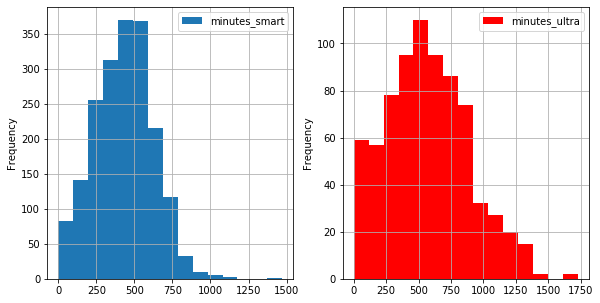

In [29]:
# Построим гистограммы использованных минут по двум тарифам
plt.subplots(figsize=(15, 5))
data_smart.plot(y='minutes', kind='hist', bins=15, ax=plt.subplot(1, 3, 1), label='minutes_smart', grid=True)
data_ultra.plot(y='minutes', kind='hist', bins=15, ax=plt.subplot(1, 3, 2), label='minutes_ultra', grid=True, color='red')
#data_revenue.plot(y='gb_used', kind='hist', by='tariff', bins=30, ax=plt.subplot(1, 3, 3))
plt.show()

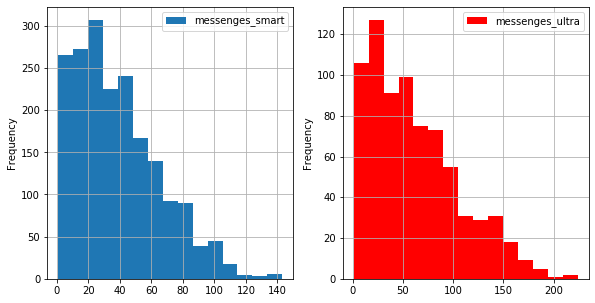

In [30]:
# Построим гистограммы отправленных сообщений по двум тарифам
plt.subplots(figsize=(15, 5))
data_smart.plot(y='messenges', kind='hist', bins=15, ax=plt.subplot(1, 3, 1), label='messenges_smart', grid=True)
data_ultra.plot(y='messenges', kind='hist', bins=15, ax=plt.subplot(1, 3, 2), label='messenges_ultra', grid=True, color='red')
plt.show()

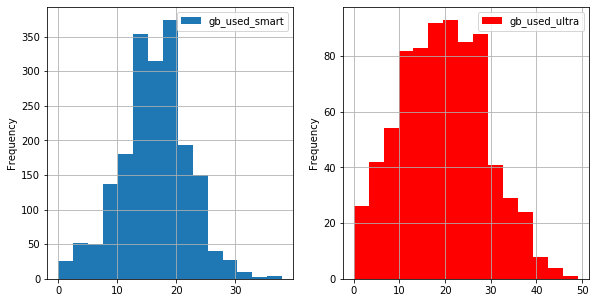

In [31]:
# Построим гистограммы использованных гигабайтов трафика по двум тарифам
plt.subplots(figsize=(15, 5))
data_smart.plot(y='gb_used', kind='hist', bins=15, ax=plt.subplot(1, 3, 1), label='gb_used_smart', grid=True)
data_ultra.plot(y='gb_used', kind='hist', bins=15, ax=plt.subplot(1, 3, 2), label='gb_used_ultra', grid=True, color='red')
plt.show()

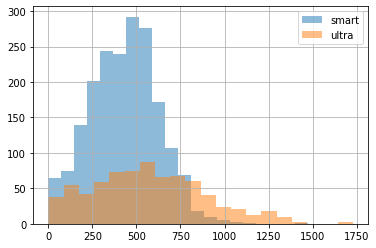

In [32]:
# Минуты
data_smart['minutes'].hist(bins=20, alpha=0.5, label='smart')
data_ultra['minutes'].hist(bins=20, alpha=0.5, label='ultra')
plt.legend(['smart', 'ultra'])
plt.show()

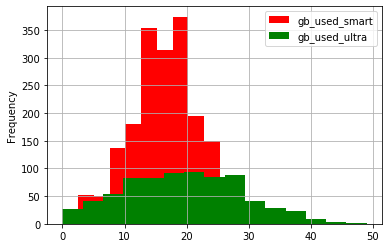

In [33]:
ax = data_smart.plot(y='gb_used', kind='hist', bins=15, label='gb_used_smart', color='r', grid=True)
data_ultra.plot(y='gb_used', kind='hist', bins=15, label='gb_used_ultra', grid=True, color='g', ax=ax)
plt.show()

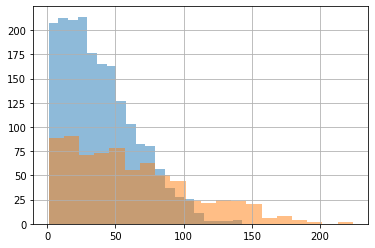

In [34]:
# SMS
data_smart['messenges'].hist(bins=20, alpha=0.5)
data_ultra['messenges'].hist(bins=20, alpha=0.5)
plt.show()

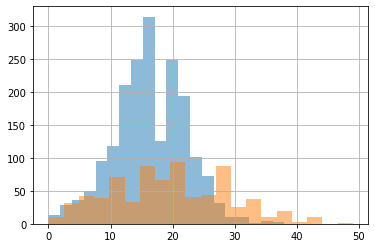

In [35]:
# GB
data_smart['gb_used'].hist(bins=20, alpha=0.5)
data_ultra['gb_used'].hist(bins=20, alpha=0.5)
plt.show()

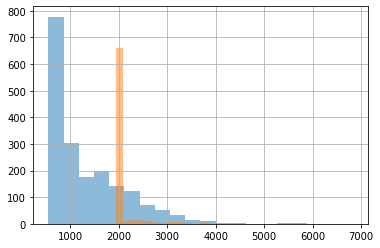

In [36]:
# Revenue
data_smart['revenue'].hist(bins=20, alpha=0.5)
data_ultra['revenue'].hist(bins=20, alpha=0.5)
plt.show()

### Вывод

Дисперсия выручки по тарифа smart существенно превышает дисперсию по тарифу ultra, что еще раз подтверждает гипотезу о том, что пользователи тарифа smart более склонны превышать лимит, нежели пользователи тарифа ultra.
Гистограммы использования минут и гигабайтов похожи на нормальное распределение. Гистограммы сообщений похожи на распределение Пуассона.

## Шаг 4. Проверяем гипотезы

In [37]:
# Добавим наименование города к таблице
data_revenue = users[['user_id', 'city']].merge(data_revenue, on='user_id')

In [38]:
# Формулируем нулевую гипотезу как "разницы между средними значениями выручки нет, они равны"
# Тогда альтернативная гипотеза будет "средняя выручка тарифа smart не равна средней выручки тарифа ultra"

alpha = .05
results = st.ttest_ind(data_smart['revenue'], data_ultra['revenue'], equal_var = True)
print('p-значение:', results.pvalue) 
if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 1.0603599758380685e-112
Отвергаем нулевую гипотезу


In [39]:
# Разделим датасет на московских пользователей и пользователей из из других регионов
data_revenue_Moscow = data_revenue[data_revenue['city'] == 'Москва']
data_revenue_no_Moscow = data_revenue[data_revenue['city'] != 'Москва']

In [40]:
# Формулируем нулевую гипотезу как "разницы между средними значениями выручки в Москве и регионах нет, они равны"
# Тогда альтернативная гипотеза будет "средняя выручка в Москве не равна средней выручке в регионах"

alpha = .05
results = st.ttest_ind(data_revenue_Moscow['revenue'], data_revenue_no_Moscow['revenue'], equal_var = True)
print('p-значение:', results.pvalue) 
if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 0.1497690154753336
Не получилось отвергнуть нулевую гипотезу


### Вывод

Так как в случае проверки гипотезы о средней выручке по двум тарифам, а также гипотезы о средней выручке по географическому признаку, выборки можно считать генеральными совокупностями, соответственно для проверки данных гипотез мы использовали t-test.
В случае со средней выручкой по тарифам мы смогли отвергнуть нулевую гипотезу, что означает, что с большой долей вероятности средняя выручка пользователей тарифов «Ультра» и «Смарт» различается. В случае со средней выручкой по географическому признаку, мы не смогли опровергнуть гипотезу о равенстве средней выручки пользователей из Москвы и из других регионов, соотвественно мы не можем утверждать, что данные средние выручки отличаются.

## Шаг 5. Общий вывод

Мы проанализировали информацию о поведении пользователей тарифов «Ультра» и «Смарт». Определили средние значения использования минут, сообщений и интернета по каждому тарифу, посчитали дисперсию и стандартное отклонение. Исходя из этой информации можно дать рекомендации коммерческому отделу по тарифу «Смарт» снизить абонентскую плату, но поднять цены на услуги сверх тарифного пакета, а по тарифу «Ультра» наоборот, снизить цены на услуги сверх тарифного пакета, но поднять стоимость абонентской платы.  Также по предоставленной выборке можно утверждать, что средняя вуручка по тарифу «Смарт» отличается от средней выручки по тарифу «Ультра», однако сказать, что средняя выручка по Москве отличается от средней выручке по регионам, мы не можем.